# PROBLEM SET #4: 
# NEURAL NETWORKS PART I

In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from function_approximator import FunctionApproximator

### General note about this problem set:

Neural networks can be a bit of a pain to train well. It takes some trial and error. You need to experimentally try different settings in order to get good performance: a different number of iterations, a different number of hidden units, a different learning rate, et cetera. The point of this problem set is not for you to spend 5000 hours tweaking each and every neural network to get the best possible performance (especially since we're not bothering to do a correct training/test/validation split). Nevertheless, some effort should be made to choose well-performing parameters. Doing so should help demystify neural networks somewhat and help you get past seeing them as magical black boxes. Also the fact that neural networks can (potentially) be tedious to train should be kept in mind before you decide to use them for a given task.

# Problem 1 (20%)

Consider approximating the following two functions defined on the unit interval $[0,1]$:

$$\begin{equation}
f_1(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3) + {\rm tanh}(x^2/3.7)\right)
\end{equation}$$

$$\begin{equation}
f_2(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3)\right)
\end{equation}$$

For each function $f_i(x)$ consider the 101-element training set 

$$\begin{equation}
\mathcal{D}_i = \left\{ x_j, y_j \right\} = \left\{ \frac{j}{100}, \;f_i\left(\frac{j}{100}\right) \right\} \qquad \rm{for} \qquad j=0,1,2,...,99,100
\end{equation}$$
    
__(a)__ How many hidden units do you need to get a MSE (mean squared error) for $\mathcal{D}_1$ below 0.1? Below 0.001? Below 0.0001?

__(b)__ How many hidden units do you need to get a MSE for $\mathcal{D}_2$ below 0.1? Below 0.001? Below 0.0001?

a)1.

epoch: 20000  cost: 0.040386
epoch: 40000  cost: 0.038274
epoch: 60000  cost: 0.037923
epoch: 80000  cost: 0.037839
epoch: 100000  cost: 0.037817
epoch: 120000  cost: 0.037810
epoch: 140000  cost: 0.037808
epoch: 160000  cost: 0.037808
epoch: 180000  cost: 0.037807
epoch: 200000  cost: 0.037807


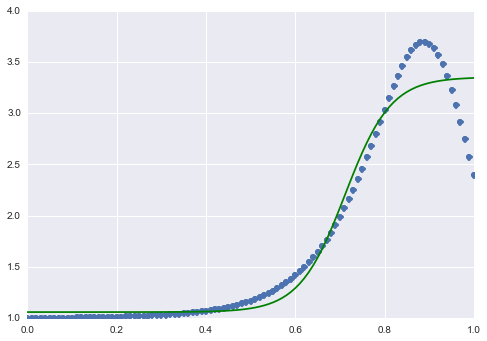

In [19]:
fa = FunctionApproximator(n_out=1, n_hidden=1)

def f(x):
    return np.exp(1.1*np.sin(2.3*(x**3))**2 + np.tanh((x**2)/3.7)) #the first function

X = np.arange(0,1.01,0.01).reshape((101,1)) #101 element
Y = f(X).reshape((101,))

fa.train(X, Y, learning_rate=0.05, n_epochs=200000, report_frequency=20000)
Y_pred = fa.get_y_pred()
# fig = plt.figure(figsize=[12,8])
plt.plot(X, Y, 'o');
plt.plot(X, Y_pred, 'g')

MSE is below 0.1 when the number of hidden unit is 1

2.

epoch: 50000  cost: 0.001196
epoch: 100000  cost: 0.001017
epoch: 150000  cost: 0.000838
epoch: 200000  cost: 0.000670
epoch: 250000  cost: 0.000538
epoch: 300000  cost: 0.000438
epoch: 350000  cost: 0.000364
epoch: 400000  cost: 0.000308
epoch: 450000  cost: 0.000268
epoch: 500000  cost: 0.000238


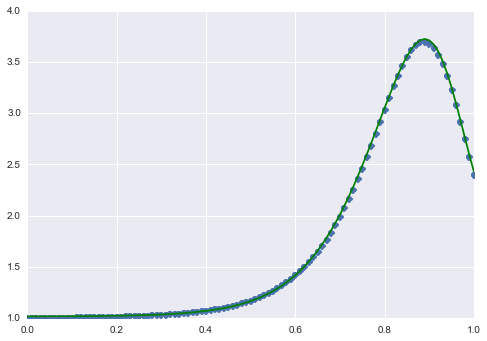

In [16]:
fa = FunctionApproximator(n_out=1, n_hidden=2)

fa.train(X, Y, learning_rate=0.2, n_epochs=500000, report_frequency=50000)
Y_pred = fa.get_y_pred()
# fig = plt.figure(figsize=[12,8])
plt.plot(X, Y, 'o');
plt.plot(X, Y_pred, 'g')

MSE is below 0.001 when the number of hidden unit is 2 
Also i am increasing learning rate and number of epochs

3.

epoch: 200000  cost: 0.000097
epoch: 400000  cost: 0.000052
epoch: 600000  cost: 0.000040
epoch: 800000  cost: 0.000032


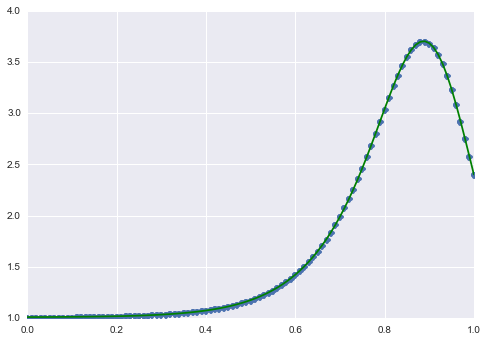

In [18]:
fa = FunctionApproximator(n_out=1, n_hidden=3)

fa.train(X, Y, learning_rate=0.3, n_epochs=800000, report_frequency=200000)
Y_pred = fa.get_y_pred()
# fig = plt.figure(figsize=[12,8])
plt.plot(X, Y, 'o');
plt.plot(X, Y_pred, 'g')

MSE is below 0.0001 when the number of hidden unit is 3
I am also increasing learning rate and the number of epochs

b)1.

epoch: 20000  cost: 0.034121
epoch: 40000  cost: 0.030441
epoch: 60000  cost: 0.029500
epoch: 80000  cost: 0.029150
epoch: 100000  cost: 0.028995
epoch: 120000  cost: 0.028921
epoch: 140000  cost: 0.028883
epoch: 160000  cost: 0.028862
epoch: 180000  cost: 0.028851
epoch: 200000  cost: 0.028845


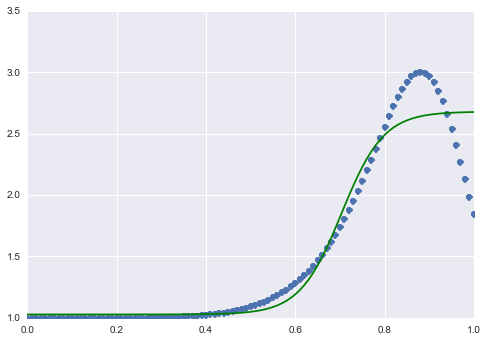

In [20]:
fa = FunctionApproximator(n_out=1, n_hidden=1)

def f(x):
    return np.exp(1.1*np.sin(2.3*(x**3))**2 ) #the second function

X = np.arange(0,1.01,0.01).reshape((101,1)) #101 element
Y = f(X).reshape((101,))

fa.train(X, Y, learning_rate=0.05, n_epochs=200000, report_frequency=20000)
Y_pred = fa.get_y_pred()
# fig = plt.figure(figsize=[12,8])
plt.plot(X, Y, 'o');
plt.plot(X, Y_pred, 'g')

MSE is below 0.1 when there is one hidden unit

2.

epoch: 20000  cost: 0.001010
epoch: 40000  cost: 0.000198
epoch: 60000  cost: 0.000140
epoch: 80000  cost: 0.000125
epoch: 100000  cost: 0.000115
epoch: 120000  cost: 0.000106
epoch: 140000  cost: 0.000099
epoch: 160000  cost: 0.000092
epoch: 180000  cost: 0.000086
epoch: 200000  cost: 0.000083


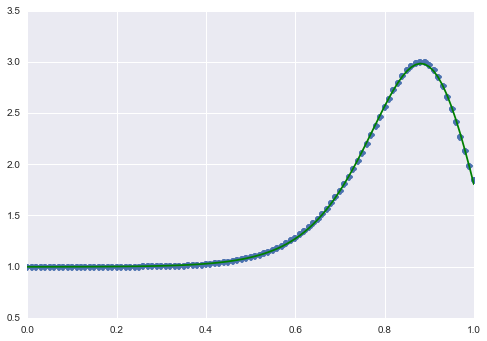

In [21]:
fa = FunctionApproximator(n_out=1, n_hidden=2)

def f(x):
    return np.exp(1.1*np.sin(2.3*(x**3))**2 )

X = np.arange(0,1.01,0.01).reshape((101,1))
Y = f(X).reshape((101,))

fa.train(X, Y, learning_rate=0.1, n_epochs=200000, report_frequency=20000)
Y_pred = fa.get_y_pred()
# fig = plt.figure(figsize=[12,8])
plt.plot(X, Y, 'o');
plt.plot(X, Y_pred, 'g')

MSE is below 0.001 when there are two hidden units

3.

epoch: 200000  cost: 0.000222
epoch: 400000  cost: 0.000118
epoch: 600000  cost: 0.000068
epoch: 800000  cost: 0.000040
epoch: 1000000  cost: 0.000025


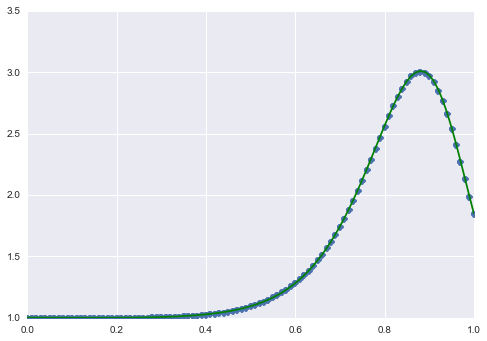

In [28]:
fa = FunctionApproximator(n_out=1, n_hidden=3)

def f(x):
    return np.exp(1.1*np.sin(2.3*(x**3))**2 )

X = np.arange(0,1.01,0.01).reshape((101,1))
Y = f(X).reshape((101,))

fa.train(X, Y, learning_rate=0.2, n_epochs=1000000, report_frequency=200000)
Y_pred = fa.get_y_pred()
# fig = plt.figure(figsize=[12,8])
plt.plot(X, Y, 'o');
plt.plot(X, Y_pred, 'g')

I need three hidden units to make MSE below 0.0001
I find that generally the more hidden units, the less MSE
the same situation happens when it comes to learning rate and n_epochs

# Problem 2 (45%)

In the lecture notebook we noted that without regularization a neural network might take on weights with extreme values. In this problem we want to explore a bit more how/when this might happen. We are again considering function approximation on the unit interval, as above. We want to consider a function $f(x)$ that also has its range contained in the unit interval as well, i.e.

$$\begin{equation}
f: [0,1] \to [0,1]
\end{equation}$$

Your goal is to construct a medium-sized dataset $\mathcal{D}$ [say with $\mathcal{O}(10-100)$ elements] that leads to a neural network with extreme weights in the weight matrix $\bf W^{(1)}$ after training. So you need to explicitly construct a dataset of the form

$$\begin{equation}
\mathcal{D} = \left\{ x_j, y_j \right\} 
\end{equation}$$

where $x_j, y_j \in [0,1]$ for all $x_j, y_j$. Choose the number of hidden units as you wish. 

_Specifically your goal is to choose $\mathcal{D}$ such that the largest element of $\bf W^{(1)}$ is larger than 25 in absolute value._ (If you can't reach 25 do the best you can)

__(a)__ Construct the dataset and print it out. 

_Tips: Consider different numbers of hidden units. Consider datasets that have some of the $x_j$ very close together. Consider datasets where the implicit function $f(x)$ behind $y_j = f(x_j)$ varies rapidly as a function of $x$. Make sure you train long enough. (These are not necessary conditions but they might help you achieve your goal)_

__(b)__ Train the neural network and plot the resulting dataset and the function approximation yielded by the neural network.

__(c)__ Use the get_weights function to demonstrate that your $\bf W^{(1)}$ does in fact have extreme weights. What's the largest weight in absolute value?

[ _to access the weights after training use something like_: [w1, b1, w2, b2] = fa.get_weights() ]

__(d)__ Explain the properties of your dataset that led to these extreme weights. 

__(e)__ Add a regularizer to your neural network and retrain on the same dataset. Plot the new function approximation and demonstrate that the weights become less extreme.



training unregulated neural network
epoch: 50000  cost: 6.614240
epoch: 100000  cost: 3.976126
epoch: 150000  cost: 2.361126
epoch: 200000  cost: 1.120083
epoch: 250000  cost: 0.718592
epoch: 300000  cost: 0.703593
highest w: 47.8235456801


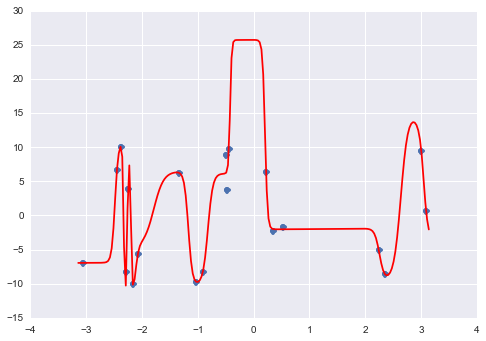

In [46]:
fa = FunctionApproximator(n_out=1, n_hidden=30)#i choose 30 hidden units

def f(x):
    return 0.1*np.sin(0.001*x)**2 - 10*np.sin(1000*x)


n_points = 20
X_sparse = np.random.uniform(low=-np.pi, high=np.pi, size=n_points).reshape((n_points,1))
X_dense  = np.linspace(-np.pi, np.pi, 200).reshape((200,1))
Y_sparse = f(X_sparse).reshape((n_points,))

print("training unregulated neural network")
fa.train(X_sparse, Y_sparse, learning_rate=0.05, n_epochs=300000, report_frequency=50000)
Y_dense_pred = fa.get_y_pred(X_dense) # unregulated prediction

#print("training regulated neural network")
#fa.train(X_sparse, Y_sparse, learning_rate=0.05, n_epochs=300000, report_frequency=50000, lambda_l2=0.005)
#Y_dense_pred_reg = fa.get_y_pred(X_dense) # regulated prediction

#fig = plt.figure(figsize=[12,8]);
plt.plot(X_sparse, Y_sparse, 'o');
plt.plot(X_dense, Y_dense_pred, 'r');
#plt.plot(X_dense, Y_dense_pred_reg, '-');
[w1,b1,w2,b2]=fa.get_weights()
print("highest w:", abs(w1).max())

In [47]:
#print out the matrix
w1

array([[ -4.17725785e+01,   7.85714084e+00,   3.68370412e+00,
          8.67668380e+00,   1.13296783e+01,   4.67536251e+01,
          4.60458748e+01,   1.12845412e+01,   1.17308627e+01,
          1.72059981e+01,  -3.86750796e+00,   5.87190912e-42,
          1.33641183e+00,  -1.66900357e+01,  -6.30495360e+00,
         -5.74539813e+00,   1.07013841e+01,  -2.26966749e+01,
         -1.76453919e+01,   4.78235457e+01,  -9.18752755e+00,
          7.98322303e+00,  -1.35159629e+01,  -7.56939826e+00,
          2.29278578e-59,   1.67395708e+01,  -8.78390945e+00,
          3.59421065e+01,  -2.49714217e-01,   2.11688907e+00]])

The reason why extreme weights exist after training is mainly because in the implicit function, y changes sharply when x changes. In other words, the values of y range widely while the values of x is close to each other.

training regulated neural network
epoch: 50000  cost: 38.622954
epoch: 100000  cost: 38.622954
epoch: 150000  cost: 38.622954
epoch: 200000  cost: 38.622954
epoch: 250000  cost: 38.622954
epoch: 300000  cost: 38.622954
highest w: 6.27004579184


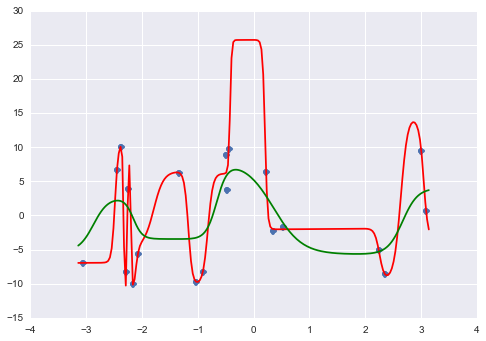

In [50]:
print("training regulated neural network")
fa.train(X_sparse, Y_sparse, learning_rate=0.05, n_epochs=300000, report_frequency=50000, lambda_l2=0.05)
Y_dense_pred_reg = fa.get_y_pred(X_dense) # regulated prediction


plt.plot(X_sparse, Y_sparse, 'o');
plt.plot(X_dense, Y_dense_pred,"r");
plt.plot(X_dense, Y_dense_pred_reg, 'g');

[w1,b1,w2,b2]=fa.get_weights()
print("highest w:", abs(w1).max())

In [49]:
w1

array([[ -1.95434247e+00,  -4.54934849e-63,   4.53326695e-63,
          3.95530511e-63,   3.88746941e-63,  -5.90986597e-63,
         -4.44523158e-63,   4.61781117e-63,   1.95434247e+00,
          3.81964694e+00,   2.69639905e-64,   6.07355731e-64,
          1.89292738e-64,   2.21793851e-63,   1.33205348e-63,
         -4.53006227e-63,   9.23892611e-64,  -3.09869779e-63,
          4.02048794e-63,   5.16503577e+00,   7.18115030e-64,
         -4.55284315e-63,   3.69690266e+00,   1.14938854e-63,
          6.27004579e+00,  -1.04259669e-64,   1.95434247e+00,
          4.50846187e-63,  -1.80599323e-64,  -4.58490075e-63]])

as we can observe, after the regulation the max value declines from 47.82 to 6.27

<br>
<br>
<br>
# Problem 3 (35%)

In the lecture notebook we used a 2-layer neural network (1 hidden layer) to classify the scikit learn "moon data"

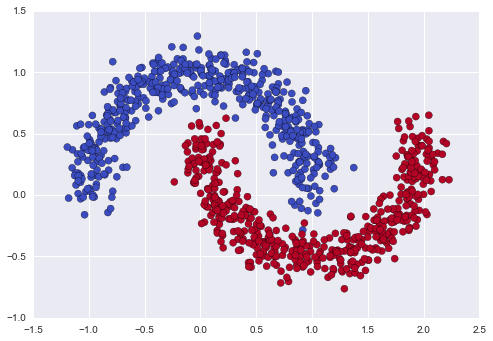

In [51]:
### use the exact dataset below for this problem
from sklearn.datasets import make_moons
np.random.seed(0)
X, Y = make_moons(1000, noise=0.11)
plt.scatter(X[:,0], X[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

In order to get decent separation between the red and blue points we needed several hidden units. Here we want to see what kind of classification error we can get if we _first process the data with Kernel PCA_.

__(a)__ When you use the 2-layer neural classifier on this dataset (just like in the lecture notebook) what's the best test performance you can get when using no more than 10 hidden units? Plot the resulting decision boundary. (Note that we just set the test set equal to the training set)

__(b)__ What kind of classification performance can you get if you _first_ transform the data using Kernel PCA and _then_ run a 2-layer neural classifier on the transformed data? What's the minimum number of hidden units you need to outperform the classifier in part (a)? What kernel and kernel settings did you use? How well can you do if you only use a _single_ hidden unit in the neural network? _Note: you needn't and/or may not want to use all the components of the kernel transformation._


a)

using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 2000, minibatch 1/1, validation error 2.000000 %
epoch 2000, minibatch 1/1, test error of best model 2.000000 %
epoch 4000, minibatch 1/1, validation error 0.800000 %
epoch 4000, minibatch 1/1, test error of best model 0.800000 %
epoch 6000, minibatch 1/1, validation error 0.400000 %
epoch 6000, minibatch 1/1, test error of best model 0.400000 %
epoch 8000, minibatch 1/1, validation error 0.200000 %
epoch 8000, minibatch 1/1, test error of best model 0.200000 %
epoch 10000, minibatch 1/1, validation error 0.200000 %
epoch 12000, minibatch 1/1, validation error 0.200000 %
epoch 14000, minibatch 1/1, validation error 0.200000 %
epoch 16000, minibatch 1/1, validation error 0.200000 %
epoch 18000, minibatch 1/1, validation error 0.200000 %
epoch 20000, minibatch 1/1, validation error 0.200000 %
epoch 22000, minibatch 1/1, validation error 0.300000 %
epoch 24000, min

The code for file neural_classifier.py ran for 10.1s


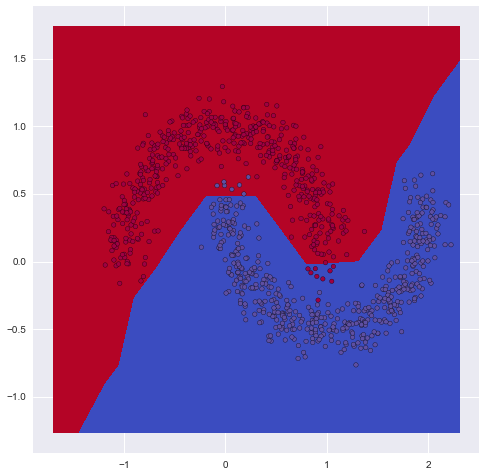

In [59]:

from neural_classifier import neural_classifier

nc = neural_classifier()
nc.train(learning_rate=0.1, n_epochs=40000,
          X_train=X, Y_train=Y, batch_size=len(Y), print_frequency=2000,
          n_in=2, n_out=2, n_hidden=10, n_layers=2)
#[test_pred, test_data, test_labels] = nc.get_test_pred(0)
#print(test_pred[0:20])
#print(test_labels[0:20])
nc.plot_decision_boundary(plt, X, Y)

the best performance occurs when the using 10 hidden units because the error rate is the smallest

b)

using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 2000, minibatch 1/1, validation error 1.500000 %
epoch 2000, minibatch 1/1, test error of best model 1.500000 %
epoch 4000, minibatch 1/1, validation error 0.400000 %
epoch 4000, minibatch 1/1, test error of best model 0.400000 %
epoch 6000, minibatch 1/1, validation error 0.200000 %
epoch 6000, minibatch 1/1, test error of best model 0.200000 %
epoch 8000, minibatch 1/1, validation error 0.200000 %
epoch 10000, minibatch 1/1, validation error 0.200000 %
epoch 12000, minibatch 1/1, validation error 0.200000 %
epoch 14000, minibatch 1/1, validation error 0.200000 %
epoch 16000, minibatch 1/1, validation error 0.200000 %
epoch 18000, minibatch 1/1, validation error 0.200000 %
epoch 20000, minibatch 1/1, validation error 0.200000 %
epoch 22000, minibatch 1/1, validation error 0.200000 %
Optimization complete with best validation score of 0.200000 %,with test perfor

The code for file neural_classifier.py ran for 5.0s


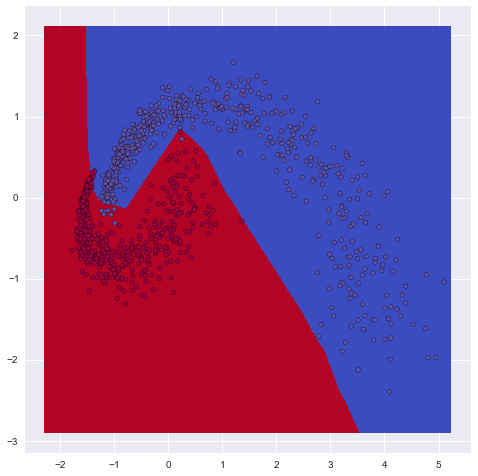

In [74]:
from sklearn.decomposition import KernelPCA

n=2 
kpca = KernelPCA(n_components=n, kernel="poly", degree=3)
Xproj = kpca.fit_transform(X)

nc = neural_classifier()
nc.train(learning_rate=0.1, n_epochs=40000,
          X_train=Xproj, Y_train=Y, batch_size=len(Y), print_frequency=2000,
          n_in=n, n_out=2, n_hidden=3, n_layers=2)
nc.plot_decision_boundary(plt, Xproj, Y)

to outperform the classifier in a), the minimum number of hidden units is 3
the kernel setting above is two components with degree of three

using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 2000, minibatch 1/1, validation error 13.200000 %
epoch 2000, minibatch 1/1, test error of best model 13.200000 %
epoch 4000, minibatch 1/1, validation error 13.200000 %
epoch 6000, minibatch 1/1, validation error 13.000000 %
epoch 6000, minibatch 1/1, test error of best model 13.000000 %
epoch 8000, minibatch 1/1, validation error 13.000000 %
epoch 10000, minibatch 1/1, validation error 13.000000 %
epoch 12000, minibatch 1/1, validation error 13.000000 %
epoch 14000, minibatch 1/1, validation error 13.000000 %
epoch 16000, minibatch 1/1, validation error 12.900000 %
epoch 16000, minibatch 1/1, test error of best model 12.900000 %
epoch 18000, minibatch 1/1, validation error 12.900000 %
epoch 20000, minibatch 1/1, validation error 12.900000 %
epoch 22000, minibatch 1/1, validation error 12.800000 %
epoch 22000, minibatch 1/1, test error of best model 12.800000 %

The code for file neural_classifier.py ran for 7.6s


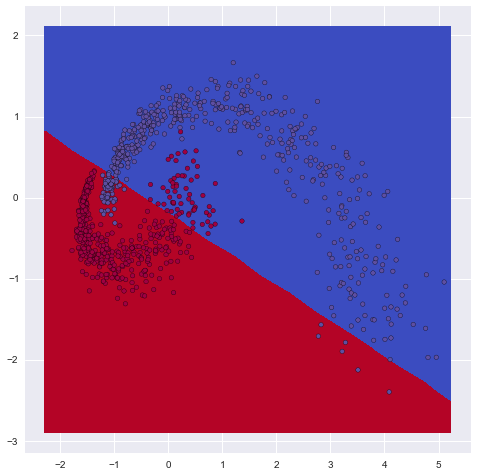

In [76]:
nc.train(learning_rate=0.1, n_epochs=50000,
          X_train=Xproj, Y_train=Y, batch_size=len(Y), print_frequency=2000,
          n_in=n, n_out=2, n_hidden=1, n_layers=2)
nc.plot_decision_boundary(plt, Xproj, Y)

if we only use single hidden unit to classify, the best we can achieve is a validation score of 12.8%